In [1]:
import numpy as np
import torch
from torch.autograd import Variable
from torch import nn
import matplotlib.pyplot as plt

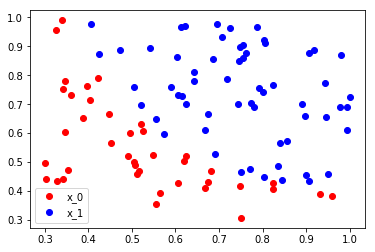

In [2]:
with open('logistic-data.txt', 'r') as f:
    data_list = [i.split('\n')[0].split(',') for i in f.readlines()]
    data = [(float(i[0]), float(i[1]), float(i[2])) for i in data_list]
    
x0_max = max(i[0] for i in data)
x1_max = max(i[1] for i in data)
data = [(i[0]/x0_max, i[1]/x0_max, i[2]) for i in data]

x0 = list(filter(lambda x: x[-1] == 0.0, data))
x1 = list(filter(lambda x: x[-1] == 1.0, data))

plot_x0 = [i[0] for i in x0]
plot_y0 = [i[1] for i in x0]
plot_x1 = [i[0] for i in x1]
plot_y1 = [i[1] for i in x1]

plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

In [3]:
np_data = np.array(data, dtype='float32')
x_data = torch.from_numpy(np_data[:, 0:2])
y_data = torch.from_numpy(np_data[:, -1]).unsqueeze(1)

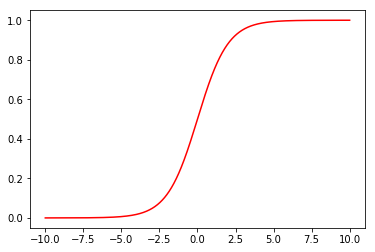

In [6]:
def sigmod(x):
    return 1 / (1 + np.exp(-x))

plot_x = np.arange(-10, 10.01, 0.01)
plot_y = sigmod(plot_x)
plt.plot(plot_x, plot_y, 'r')

In [7]:
x_data = Variable(x_data)
y_data = Variable(y_data)

In [16]:
w = Variable(torch.randn(2, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

def logistic_regression(x):
    return torch.sigmoid(torch.mm(x, w) + b)

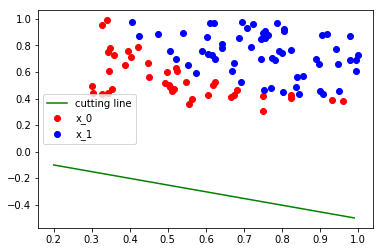

In [17]:
w0 = w[0].item()
w1 = w[1].item()
b0 = b.item()

plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x - b0) / w1

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

In [18]:
def binary_loss(y_, y):
    logits = (y * y_.clamp(1e-12).log() + (1 - y) * (1 - y_).clamp(1e-12).log()).mean()
    return -logits

y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

tensor(0.8261, grad_fn=<NegBackward>)


In [19]:
loss.backward()
w.data = w.data - 0.1 * w.grad.data
b.data = b.data - 0.1 * b.grad.data

y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

tensor(0.8124, grad_fn=<NegBackward>)


In [20]:
w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))
optimizer = torch.optim.SGD([w, b], lr=1.)

In [21]:
import time
start = time.time()
for e in range(1000):
    # forward
    y_pred = logistic_regression(x_data)
    loss = binary_loss(y_pred, y_data)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    mask = y_pred.ge(0.5).float()
    acc = (mask == y_data).sum().item() / y_data.shape[0]
    if (e + 1) % 200 == 0:
        print('Epoch: {}, Loss: {:.5f}, Acc: {:.5f}'.format(e+1, loss.item(), acc))
during = time.time() - start
print('\nDuring Time: {:.3f} s'.format(during))

Epoch: 200, Loss: 0.42672, Acc: 0.90000
Epoch: 400, Loss: 0.33662, Acc: 0.92000
Epoch: 600, Loss: 0.29720, Acc: 0.91000
Epoch: 800, Loss: 0.27495, Acc: 0.91000
Epoch: 1000, Loss: 0.26057, Acc: 0.90000

During Time: 0.288 s


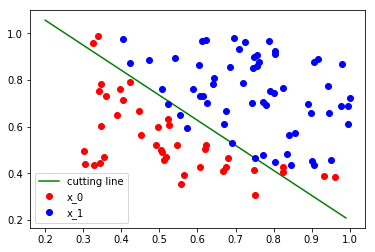

In [22]:
w0 = w[0].item()
w1 = w[1].item()
b0 = b.item()

plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x - b0) / w1

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

In [23]:
# sigmoid & loss
criterion = nn.BCEWithLogitsLoss()

w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))

# without sigmoid
def logistic_reg(x):
    return torch.mm(x, w) + b

optimizer = torch.optim.SGD([w, b], 1.)

y_pred = logistic_reg(x_data)
loss = criterion(y_pred, y_data)
print(loss.item())

0.7353199124336243


In [24]:
start = time.time()
for e in range(1000):
    # forward
    y_pred = logistic_reg(x_data)
    loss = criterion(y_pred, y_data)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    mask = y_pred.ge(0.5).float()
    acc = (mask == y_data).sum().item() / y_data.shape[0]
    if (e + 1) % 200 == 0:
        print('Epoch: {}, Loss: {:.5f}, Acc: {:.5f}'.format(e+1, loss.item(), acc))
during = time.time() - start
print('\nDuring Time: {:.3f} s'.format(during))

Epoch: 200, Loss: 0.40402, Acc: 0.88000
Epoch: 400, Loss: 0.32782, Acc: 0.88000
Epoch: 600, Loss: 0.29255, Acc: 0.87000
Epoch: 800, Loss: 0.27206, Acc: 0.87000
Epoch: 1000, Loss: 0.25859, Acc: 0.87000

During Time: 0.302 s
